<a href="https://colab.research.google.com/github/jungddddd/kaggle/blob/main/kaggle_%EC%8B%A4%EC%8A%B5_%ED%95%99%EC%83%9D%EC%9D%98_%ED%95%99%EC%97%85_%EC%84%B1%EC%B7%A8%EB%8F%84%EC%97%90_%EC%98%81%ED%96%A5%EC%9D%84_%EC%A3%BC%EB%8A%94_%EC%9A%94%EC%9D%B8_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터 소개
  - xAPI-Edu-Data.csv
    - 데이터 출처: https://www.kaggle.com/aljarah/xAPI-Edu-Data
    
  - 데이터의 컬럼


```
    gender: 학생의 성별 (M: 남성, F: 여성)
    NationaliTy: 학생의 국적
    PlaceofBirth: 학생이 태어난 국가
    StageID: 학생이 다니는 학교 (초,중,고)
    GradeID: 학생이 속한 성적 등급
    SectionID: 학생이 속한 반 이름
    Topic: 수강한 과목
    Semester: 수강한 학기 (1학기/2학기)
    Relation: 주 보호자와 학생의 관계
    raisedhands: 학생이 수업 중 손을 든 횟수
    VisITedResources: 학생이 강의 내용을 확인한 횟수
    AnnouncementsView: 학생이 공지를 확인한 횟수
    Discussion: 학생이 토론 그룹에 참여한 횟수
    ParentAnsweringSurvey: 부모가 학교 설문에 참여했는지 여부
    ParentschoolSatisfaction: 부모가 학교에 만족했는지 여부
    StudentAbscenceDays: 학생의 결석 횟수 (7회 이상/미만)
    Class: 학생의 성적 등급 (L: 낮음, M: 보통, H: 높음)
```

### 데이터셋 준비하기

In [ ]:
# 필요한 모듈 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# pandas의 read_csv()로 파일을 불러와 df 변수에 할당
# 데이터 확인
df = pd.read_csv('/content/drive/MyDrive/Bigdata_ML/III.빅데이터_분석을 _위한_파이썬_기반_머신러닝/2.모델/2.분류/연습/xAPI-Edu-Data.csv')
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


### EDA 및 데이터 기초 통계 분석


In [ ]:
# head() : 데이터 처음부터 5개 확인
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [ ]:
# info() : 데이터의 컬럼별 타입, 개수 등 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [ ]:
# describe() : 숫자형 데이터의 기본 통계값 확인
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [ ]:
# columns : 데이터의 컬럼명 확인
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [ ]:
# value_counts() : 범주형 데이터의 카테고리별 빈도 확인
# gender : 학생의 성별 (M: 남성, F: 여성)
df['gender'].value_counts()

M    305
F    175
Name: gender, dtype: int64

In [ ]:
# value_counts() : 범주형 데이터의 카테고리별 빈도 확인
# NationaliTy : 학생의 국적
df['NationalITy'].value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

In [ ]:
# value_counts() : 범주형 데이터의 카테고리별 빈도 확인
# PlaceofBirth : 학생이 태어난 국가
df['PlaceofBirth'].value_counts()

KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64

In [ ]:
# columns : 데이터의 컬럼명 확인
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

#### 숫자형 데이터 시각화

<Axes: xlabel='raisedhands', ylabel='Count'>

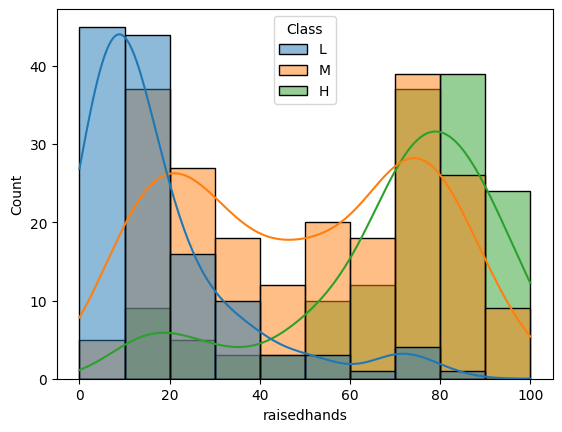

In [ ]:
# seaborn의 histplot을 이용해 히스토그램 그리기
# raisedhands : 학생이 수업 중 손을 든 횟수
# class를 분류하여 확인
# 뚜렷한 쌍봉의 형태
# 수업 중 손을 많이 든 학생들이 좋은 성적을 받을 것이다 예측
sns.histplot(x='raisedhands', data=df, hue='Class', hue_order=['L', 'M', 'H'], kde=True)

<Axes: xlabel='VisITedResources', ylabel='Count'>

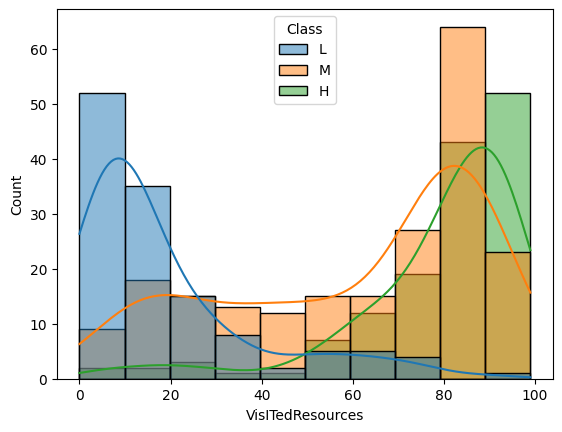

In [ ]:
# seaborn의 histplot을 이용해 히스토그램 그리기
# VisITedResources : 학생이 강의 내용을 확인한 횟수
# class를 분류하여 확인
# 뚜렷한 쌍봉의 형태
# 강의 내용을 많이 확인한 학생들이 좋은 성적을 받을 것이다 예측
sns.histplot(x='VisITedResources', data=df, hue='Class', hue_order=['L', 'M', 'H'], kde=True)

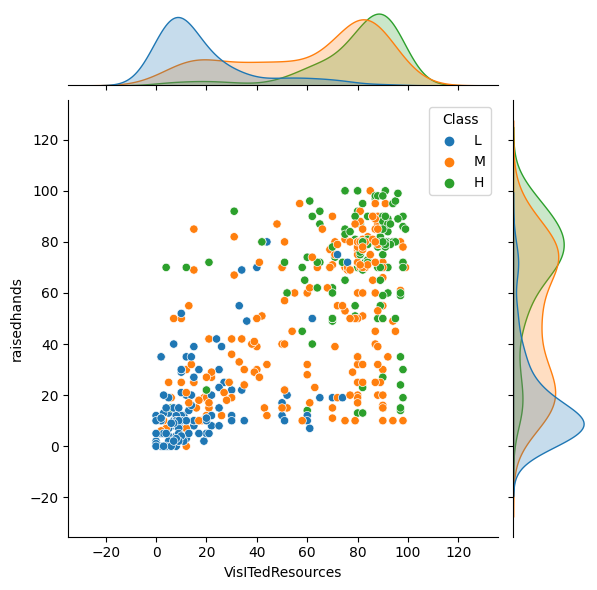

In [ ]:
# seaborn의 jointplot을 이용해 VisITedResources 와  raisedhands 간의 산점도와 히스토그램 그리기
# VisITedResources : 학생이 강의 내용을 확인한 횟수
# raisedhands : 학생이 수업 중 손을 든 횟수
# class를 분류하여 확인
# H, L 구분 확인, M, H는 구분 애매
sns.jointplot(x='VisITedResources', y='raisedhands', data=df, hue='Class', hue_order=['L', 'M', 'H'])

<Axes: xlabel='AnnouncementsView', ylabel='Count'>

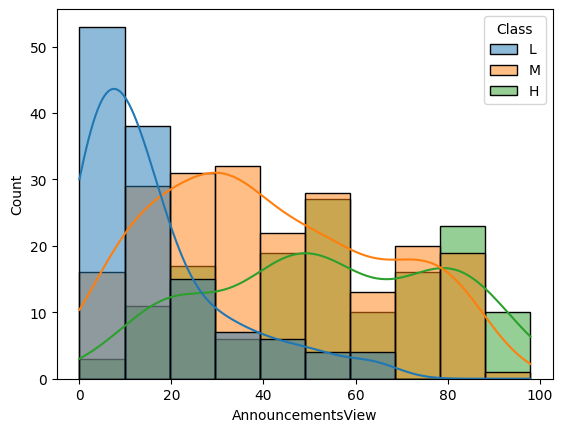

In [ ]:
# seaborn의 histplot을 이용해 히스토그램 그리기
# AnnouncementsView : 학생이 공지를 확인한 횟수
# class를 분류하여 확인
# 공지를 확인하지 않는 학생들은 좋은 성적을 받지 않을 것이다. 예측
sns.histplot(x='AnnouncementsView', data=df, hue='Class', hue_order=['L', 'M', 'H'], kde=True)

<Axes: xlabel='Discussion', ylabel='Count'>

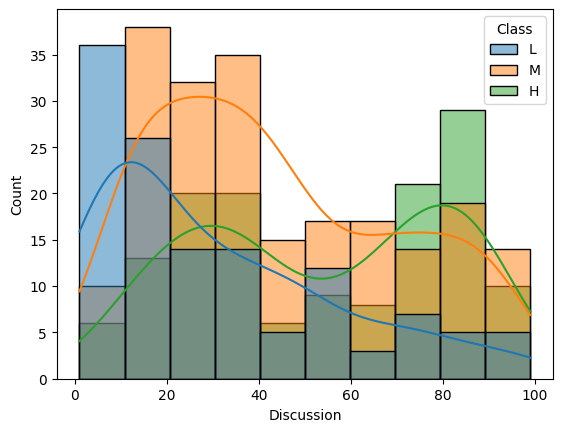

In [ ]:
# seaborn의 histplot을 이용해 히스토그램 그리기
# Discussion : 학생이 토론 그룹에 참여한 횟수
# class를 분류하여 확인
sns.histplot(x='Discussion', data=df, hue='Class', hue_order=['L', 'M', 'H'], kde=True)

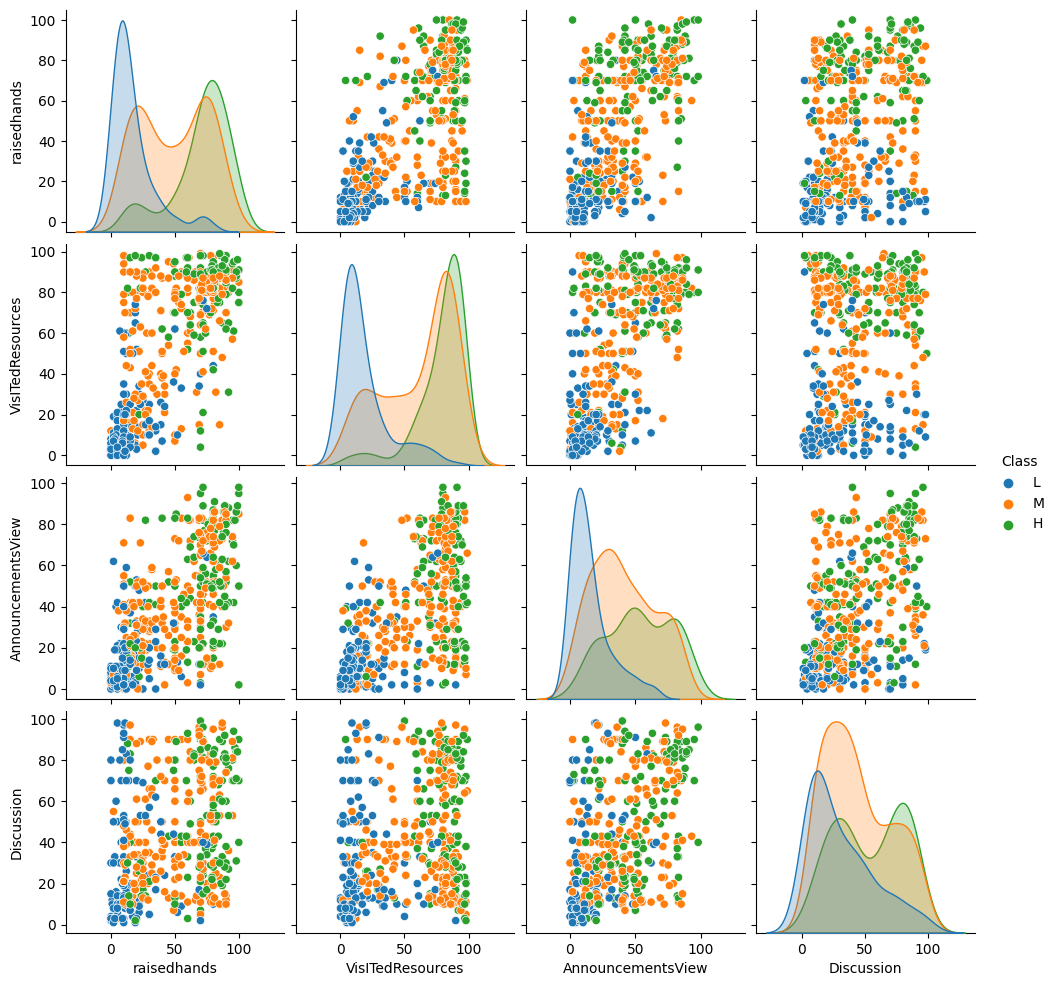

In [ ]:
# seaborn의 pairplot을 이용해 히스토그램과 산점도 그리기
# df의 숫자형 데이터를 이용해 도식화
# class를 분류하여 확인
# 산점도가 대각선으로 나타날 수록 상관이 있음. 전반적으로 퍼져있다면 상관성이 낮다
# 히스토그램 상 raisedhands 와 VisITedResources 가 잘 비슷해 보여 상관성이 높을 것 같으나 산점도로는 그정도의 상관은 없음
# raisedhands 와 VisITedResources는 서로 다른 축에서 다른 의미로 데이터를 나눠줄 수 있음.
# 따라서 두개 변수를 같이 넣고 분석하는게 도움이 될 것으로 판단
sns.pairplot(df, hue='Class', hue_order=['L', 'M', 'H'])

#### 범주형 데이터 시각화

<Axes: xlabel='Class', ylabel='count'>

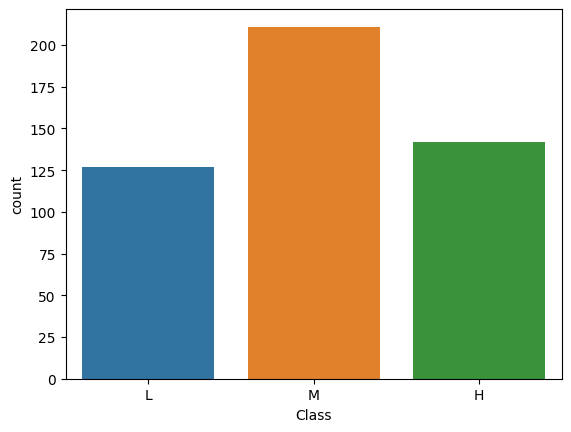

In [ ]:
# seaborn의 countplot을 사용하여 막대그래프 그리기
# order=['L', 'M', 'H'] 로 도식화 순서 지정
sns.countplot(x='Class', data=df, order=['L', 'M', 'H'])

<Axes: xlabel='gender', ylabel='count'>

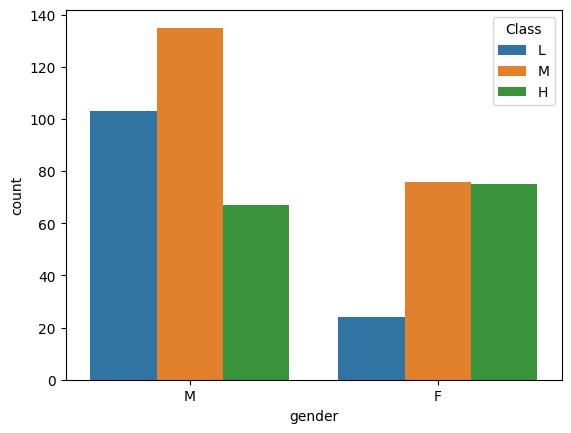

In [ ]:
# seaborn의 countplot을 사용하여 막대그래프 그리기
# gender : 학생의 성별 (M: 남성, F: 여성)
# hue로 class 를 분류하여 확인
# order=['L', 'M', 'H'] 로 도식화 순서 지정
# 남학생은 성적이 낮은쪽에 많이 분포, 여학생은 성적이 높은쪽에 많이 분포
sns.countplot(x='gender', data=df, hue='Class', hue_order=['L', 'M', 'H'])

In [ ]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

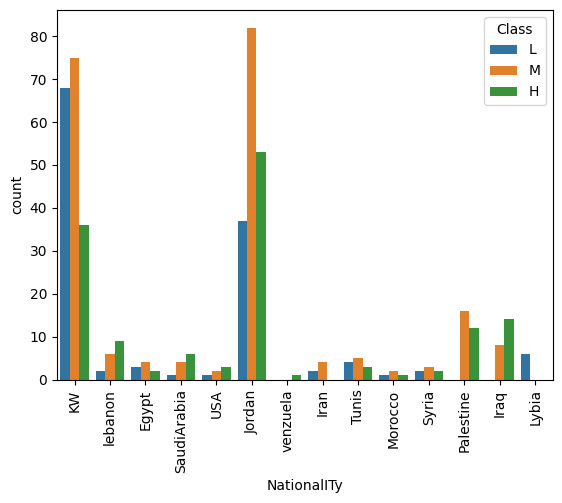

In [ ]:
# seaborn의 countplot을 사용하여 막대그래프 그리기
# NationaliTy : 학생의 국적
# hue로 class 를 분류하여 확인
# order=['L', 'M', 'H'] 로 도식화 순서 지정
# xticks() 함수의 rotation파라미터를 90으로 지정해 x 축의 값을 90도 회전시킴
# 쿠웨이트, 리비야는 성적이 낮은쪽에 많이 분포, 미국, 레바논, 요르단, 이라크 는 성적이 높은 쪽에 많이 분포
sns.countplot(x='NationalITy', data=df, hue='Class', hue_order=['L', 'M', 'H'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='ParentAnsweringSurvey', ylabel='count'>

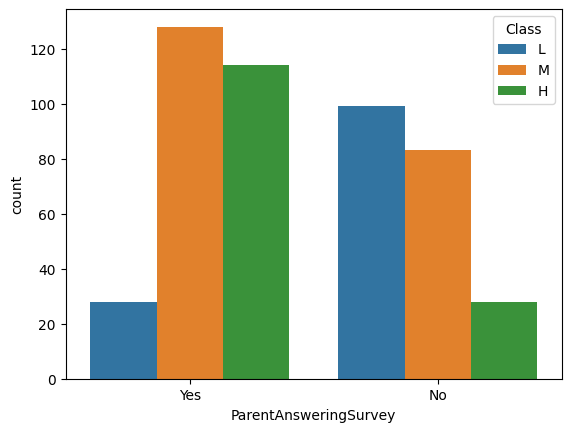

In [ ]:
# seaborn의 countplot을 사용하여 막대그래프 그리기
# ParentAnsweringSurvey : 부모가 학교 설문에 참여했는지 여부
# hue로 class 를 분류하여 확인
# order=['L', 'M', 'H'] 로 도식화 순서 지정
# 부모가 설문에 참여한 경우 성적이 높은 쪽에 많이 분포
sns.countplot(x='ParentAnsweringSurvey', data=df, hue='Class', hue_order=['L', 'M', 'H'])

<Axes: xlabel='ParentschoolSatisfaction', ylabel='count'>

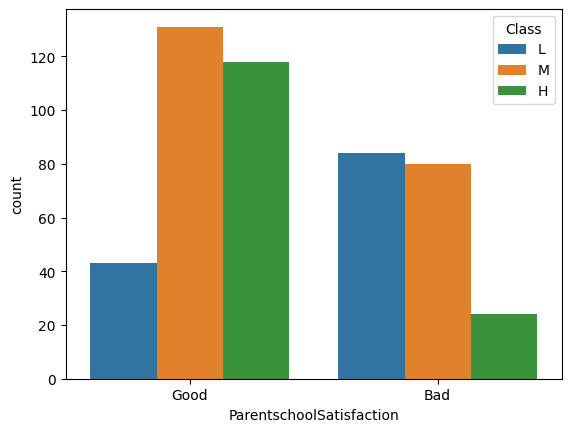

In [ ]:
# seaborn의 countplot을 사용하여 막대그래프 그리기
# ParentschoolSatisfaction : 부모가 학교에 만족했는지 여부
# hue로 class 를 분류하여 확인
# order=['L', 'M', 'H'] 로 도식화 순서 지정
# 부모의 만족도가 높은 경우 학생의 성적이 높은 쪽에 많이 분포
sns.countplot(x='ParentschoolSatisfaction', data=df, hue='Class', hue_order=['L', 'M', 'H'])

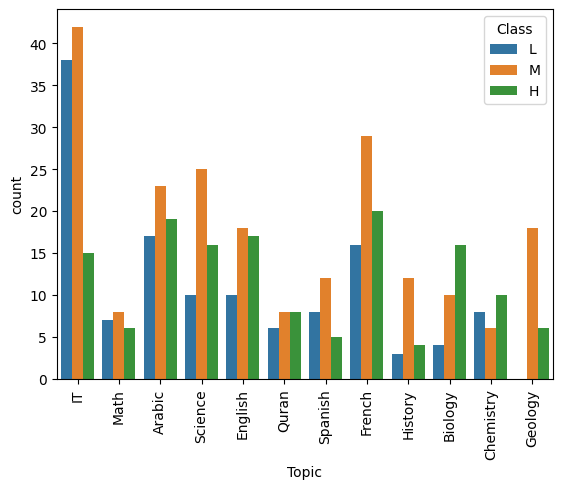

In [ ]:
# seaborn의 countplot을 사용하여 막대그래프 그리기
# Topic : 수강한 과목
# hue로 class 를 분류하여 확인
# order=['L', 'M', 'H'] 로 도식화 순서 지정
# xticks() 함수의 rotation파라미터를 90으로 지정해 x 축의 값을 90도 회전시킴
# IT를 선택한 경우 낮은 성적, biology 를 선택한 경우 높은 성적, cheimstry 를 선택한 경우 성적이 나눠짐
sns.countplot(x='Topic', data=df, hue='Class', hue_order=['L', 'M', 'H'])
plt.xticks(rotation=90)
plt.show()

#### target Class를 수치로 바꿔 표현하기

In [ ]:
# Class 컬럼의 카테고리인 L, M, H를 숫자로 바꾸어 표현
# L: -1, M: 0, H:1 로 (임의로)변경하여 Class_value 컬럼으로 추가
# map() 사용
df['Class_value'] = df['Class'].map(dict(L=-1, M=0, H=1))
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Class_value
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,0
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,-1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,-1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,0


In [ ]:
# 숫자로 바꾼 Class_value 컬럼을 이용해 막대그래프 그리기
# gender(학생의 성별 (M: 남성, F: 여성))에 따른 등급 평균 계산
# 남학생은 L이 많아서 음수, 여학생은 H가 많아서 양수로 출력
gb = df.groupby('gender').mean()['Class_value']
plt.bar(gb.index, gb)

<ipython-input-31-0688dc082f25>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gb = df.groupby('Topic').mean()['Class_value'].sort_values()


<BarContainer object of 12 artists>

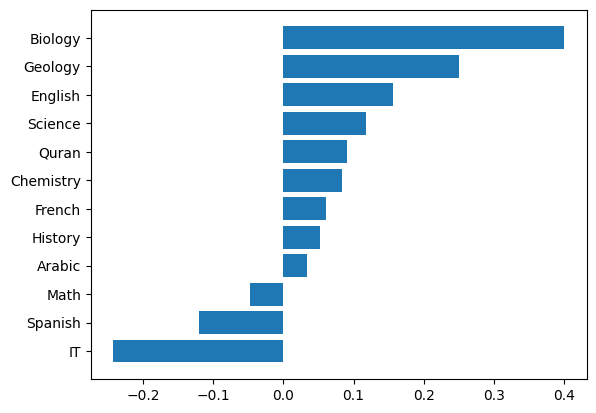

In [ ]:
# 숫자로 바꾼 Class_value 컬럼을 이용해 가로막대그래프 그리기
# Topic(수강한 과목)에 따른 등급 평균 계산
# sort_values() 함수로 정렬. 기본은 오름차순 정렬
gb = df.groupby('Topic').mean()['Class_value'].sort_values()
plt.barh(gb.index, gb)

<ipython-input-32-45a66992c117>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gb = df.groupby('StudentAbsenceDays').mean()['Class_value'].sort_values(ascending=False)


<BarContainer object of 2 artists>

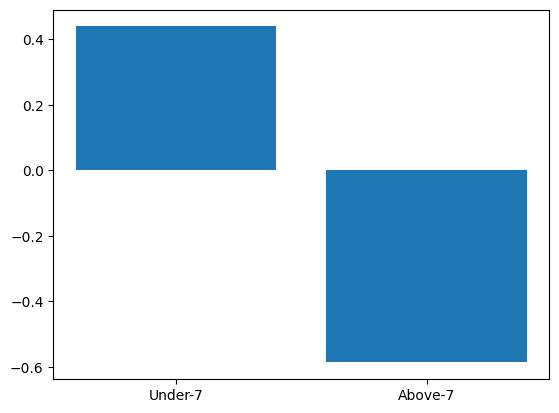

In [ ]:
# 숫자로 바꾼 Class_value 컬럼을 이용해 막대그래프 그리기
# StudentAbscenceDays : 학생의 결석 횟수 (7회 이상/미만)
# StudentAbscenceDays(학생의 결석 횟수)에 따른 등급 평균 계산
# # sort_values() 함수로 정렬. ascending 파라미터를 False로 내림차순 정렬
gb = df.groupby('StudentAbsenceDays').mean()['Class_value'].sort_values(ascending=False)
plt.bar(gb.index, gb)

### 데이터 전처리


####  get_dummies()를 이용하여 범주형 데이터 전처리하기


In [ ]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class', 'Class_value'],
      dtype='object')

In [ ]:
# X(feature)와 y(target) 분류
# pandas의 get_dummies() 함수를 이용해 범주형 데이터를 one-hot 벡터로 변환하기
# 다중공선성(Multicollinearity)을 피하기 위해 drop_first=True로 설정
# 'ParentschoolSatisfaction', 'Class', 'Class_value' 삭제
# Class를 y로 지정
X = pd.get_dummies(df.drop(['ParentschoolSatisfaction', 'Class', 'Class_value'], axis=1),
                   columns=['gender', 'NationalITy', 'PlaceofBirth',
                            'StageID', 'GradeID','SectionID', 'Topic',
                            'Semester', 'Relation', 'ParentAnsweringSurvey',
                            'StudentAbsenceDays'],
                            drop_first=True)
y = df['Class']

In [ ]:
# X 데이터 확인
X.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,...,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,StudentAbsenceDays_Under-7
0,15,16,2,20,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1
1,20,20,3,25,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1
2,10,7,0,30,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,30,25,5,35,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,40,50,12,50,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
# y 데이터 확인
y.head()

0    M
1    M
2    L
3    L
4    M
Name: Class, dtype: object

#### 학습데이터와 테스트데이터 분리


In [ ]:
# sklearn.model_selection 의 train_test_split 함수 불러오기
from sklearn.model_selection import train_test_split

In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=1)

### 분류 모델 학습하기


#### Logistic Regression 모델 생성/학습/평가


In [ ]:
# sklearn.linear_model 의 LogisticRegression 불러오기
from sklearn.linear_model import LogisticRegression

In [ ]:
# LogisticRegression 모델 생성
# train 데이터로 모델 학습
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# sklearn.metrics 의classification_report 함수 불러오기
from sklearn.metrics import classification_report

In [ ]:
# test 데이터를 이용해 predict를 수행
# classification_report()를 이용해 실제값(y_test)와 예측값(y_pred) 비교 결과 출력하기
# 정확도 : 0.70
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           H       0.77      0.67      0.72        55
           L       0.79      0.79      0.79        33
           M       0.60      0.68      0.64        56

    accuracy                           0.70       144
   macro avg       0.72      0.71      0.71       144
weighted avg       0.71      0.70      0.70       144



#### DT 모델 생성/학습/평가

In [ ]:
# sklearn.tree 의 DecisionTreeClassifier 불러오기
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# DecisionTreeClassifier 모델 생성
# train 데이터로 모델 학습
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# sklearn.metrics 의classification_report 함수 불러오기
from sklearn.metrics import classification_report

In [ ]:
# test 데이터를 이용해 predict를 수행
# classification_report()를 이용해 실제값(y_test)와 예측값(y_pred_dt) 비교 결과 출력하기
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           H       0.70      0.67      0.69        55
           L       0.76      0.85      0.80        33
           M       0.61      0.59      0.60        56

    accuracy                           0.68       144
   macro avg       0.69      0.70      0.70       144
weighted avg       0.68      0.68      0.68       144



#### kNN 모델 생성/학습/평가

In [ ]:
# sklearn.neighbors 의 KNeighborsClassifier 불러오기
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# KNeighborsClassifier 모델 생성
# 하이퍼파라미터를 5로 지정
# train 데이터로 모델 학습
knn = KNeighborsClassifier(5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# sklearn.metrics 의classification_report 함수 불러오기
from sklearn.metrics import classification_report

In [ ]:
# test 데이터를 이용해 predict를 수행
# classification_report()를 이용해 실제값(y_test)와 예측값(y_pred_dt) 비교 결과 출력하기
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           H       0.69      0.53      0.60        55
           L       0.83      0.76      0.79        33
           M       0.54      0.70      0.61        56

    accuracy                           0.65       144
   macro avg       0.69      0.66      0.67       144
weighted avg       0.67      0.65      0.65       144



#### SVM 모델 생성/학습/평가

In [ ]:
# sklearn 의 svm 불러오기
from sklearn import svm

In [ ]:
# svm.SVC 모델 생성
# kernel을'linear'로 지정
# train 데이터로 모델 학습
svm = svm.SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# sklearn.metrics 의classification_report 함수 불러오기
from sklearn.metrics import classification_report

In [ ]:
# test 데이터를 이용해 predict를 수행
# classification_report()를 이용해 실제값(y_test)와 예측값(y_pred_dt) 비교 결과 출력하기
y_pred_svm = svm.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           H       0.80      0.65      0.72        55
           L       0.79      0.79      0.79        33
           M       0.61      0.71      0.66        56

    accuracy                           0.71       144
   macro avg       0.73      0.72      0.72       144
weighted avg       0.72      0.71      0.71       144



### 모델 학습 결과 심화 분석하기


#### Logistic Regression 모델 계수로 상관성 파악하기

In [ ]:
# classes_ 속성으로 분류된 class 확인
lr.classes_

array(['H', 'L', 'M'], dtype=object)

In [ ]:
# coef_ : 계수
# (3, 59)의 3은 클래스, 59는 feature 개수
lr.coef_.shape

(3, 59)

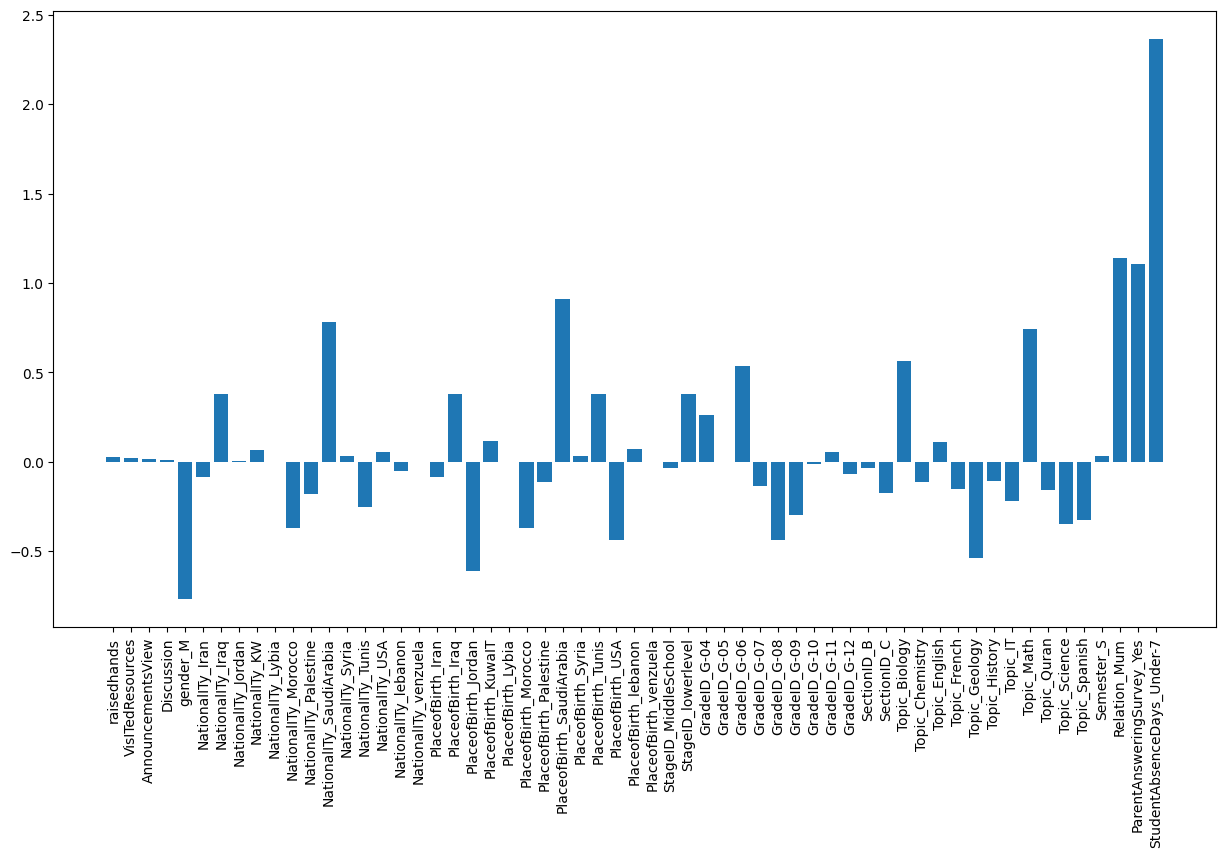

In [ ]:
# Logistic Regression 모델의 coef_ 속성을 plot하기
# H 에 미치는 영향 정도 확인
fig = plt.figure(figsize=(15, 8))
plt.bar(X.columns, lr.coef_[0, :])
plt.xticks(rotation=90)
plt.show()